In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x : '{:.2f}'.format(x) )
np.set_printoptions(suppress=True)


In [4]:
df_customers=pd.read_csv("Data_Collection_Resources/customers.csv")
df_bureau=pd.read_csv("Data_Collection_Resources/bureau_data.csv")
df_loans=pd.read_csv("Data_Collection_Resources/loans.csv")

In [5]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [6]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [7]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df= pd.merge(df_customers, df_loans, on = "cust_id" )
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [9]:
df_bureau.head(3)

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58


In [10]:
df = pd.merge(df,  df_bureau, on = "cust_id")
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [12]:
df["default"] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [13]:
# 0- false, 1- true, also class imbalance 

In [14]:
4297/45703

0.0940200862087828

In [15]:
X = df.drop("default", axis=1)
y=df['default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state =42)

df_train = pd.concat([X_train, y_train], axis = 'columns')
df_test = pd.concat([X_test, y_test], axis = 'columns')

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0


In [16]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [17]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [18]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [19]:
# actually we can drop these rows, but we gonna deal it like industry manner

In [20]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [21]:
df_train.residence_type.fillna(mode_residence, inplace=True)

C:\Users\wizar\AppData\Local\Temp\ipykernel_34896\2407676634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)


In [22]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [23]:
df_test.residence_type.fillna(mode_residence, inplace=True)

C:\Users\wizar\AppData\Local\Temp\ipykernel_34896\504530992.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace=True)


In [24]:
df_train.duplicated().sum()

np.int64(0)

In [25]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [26]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

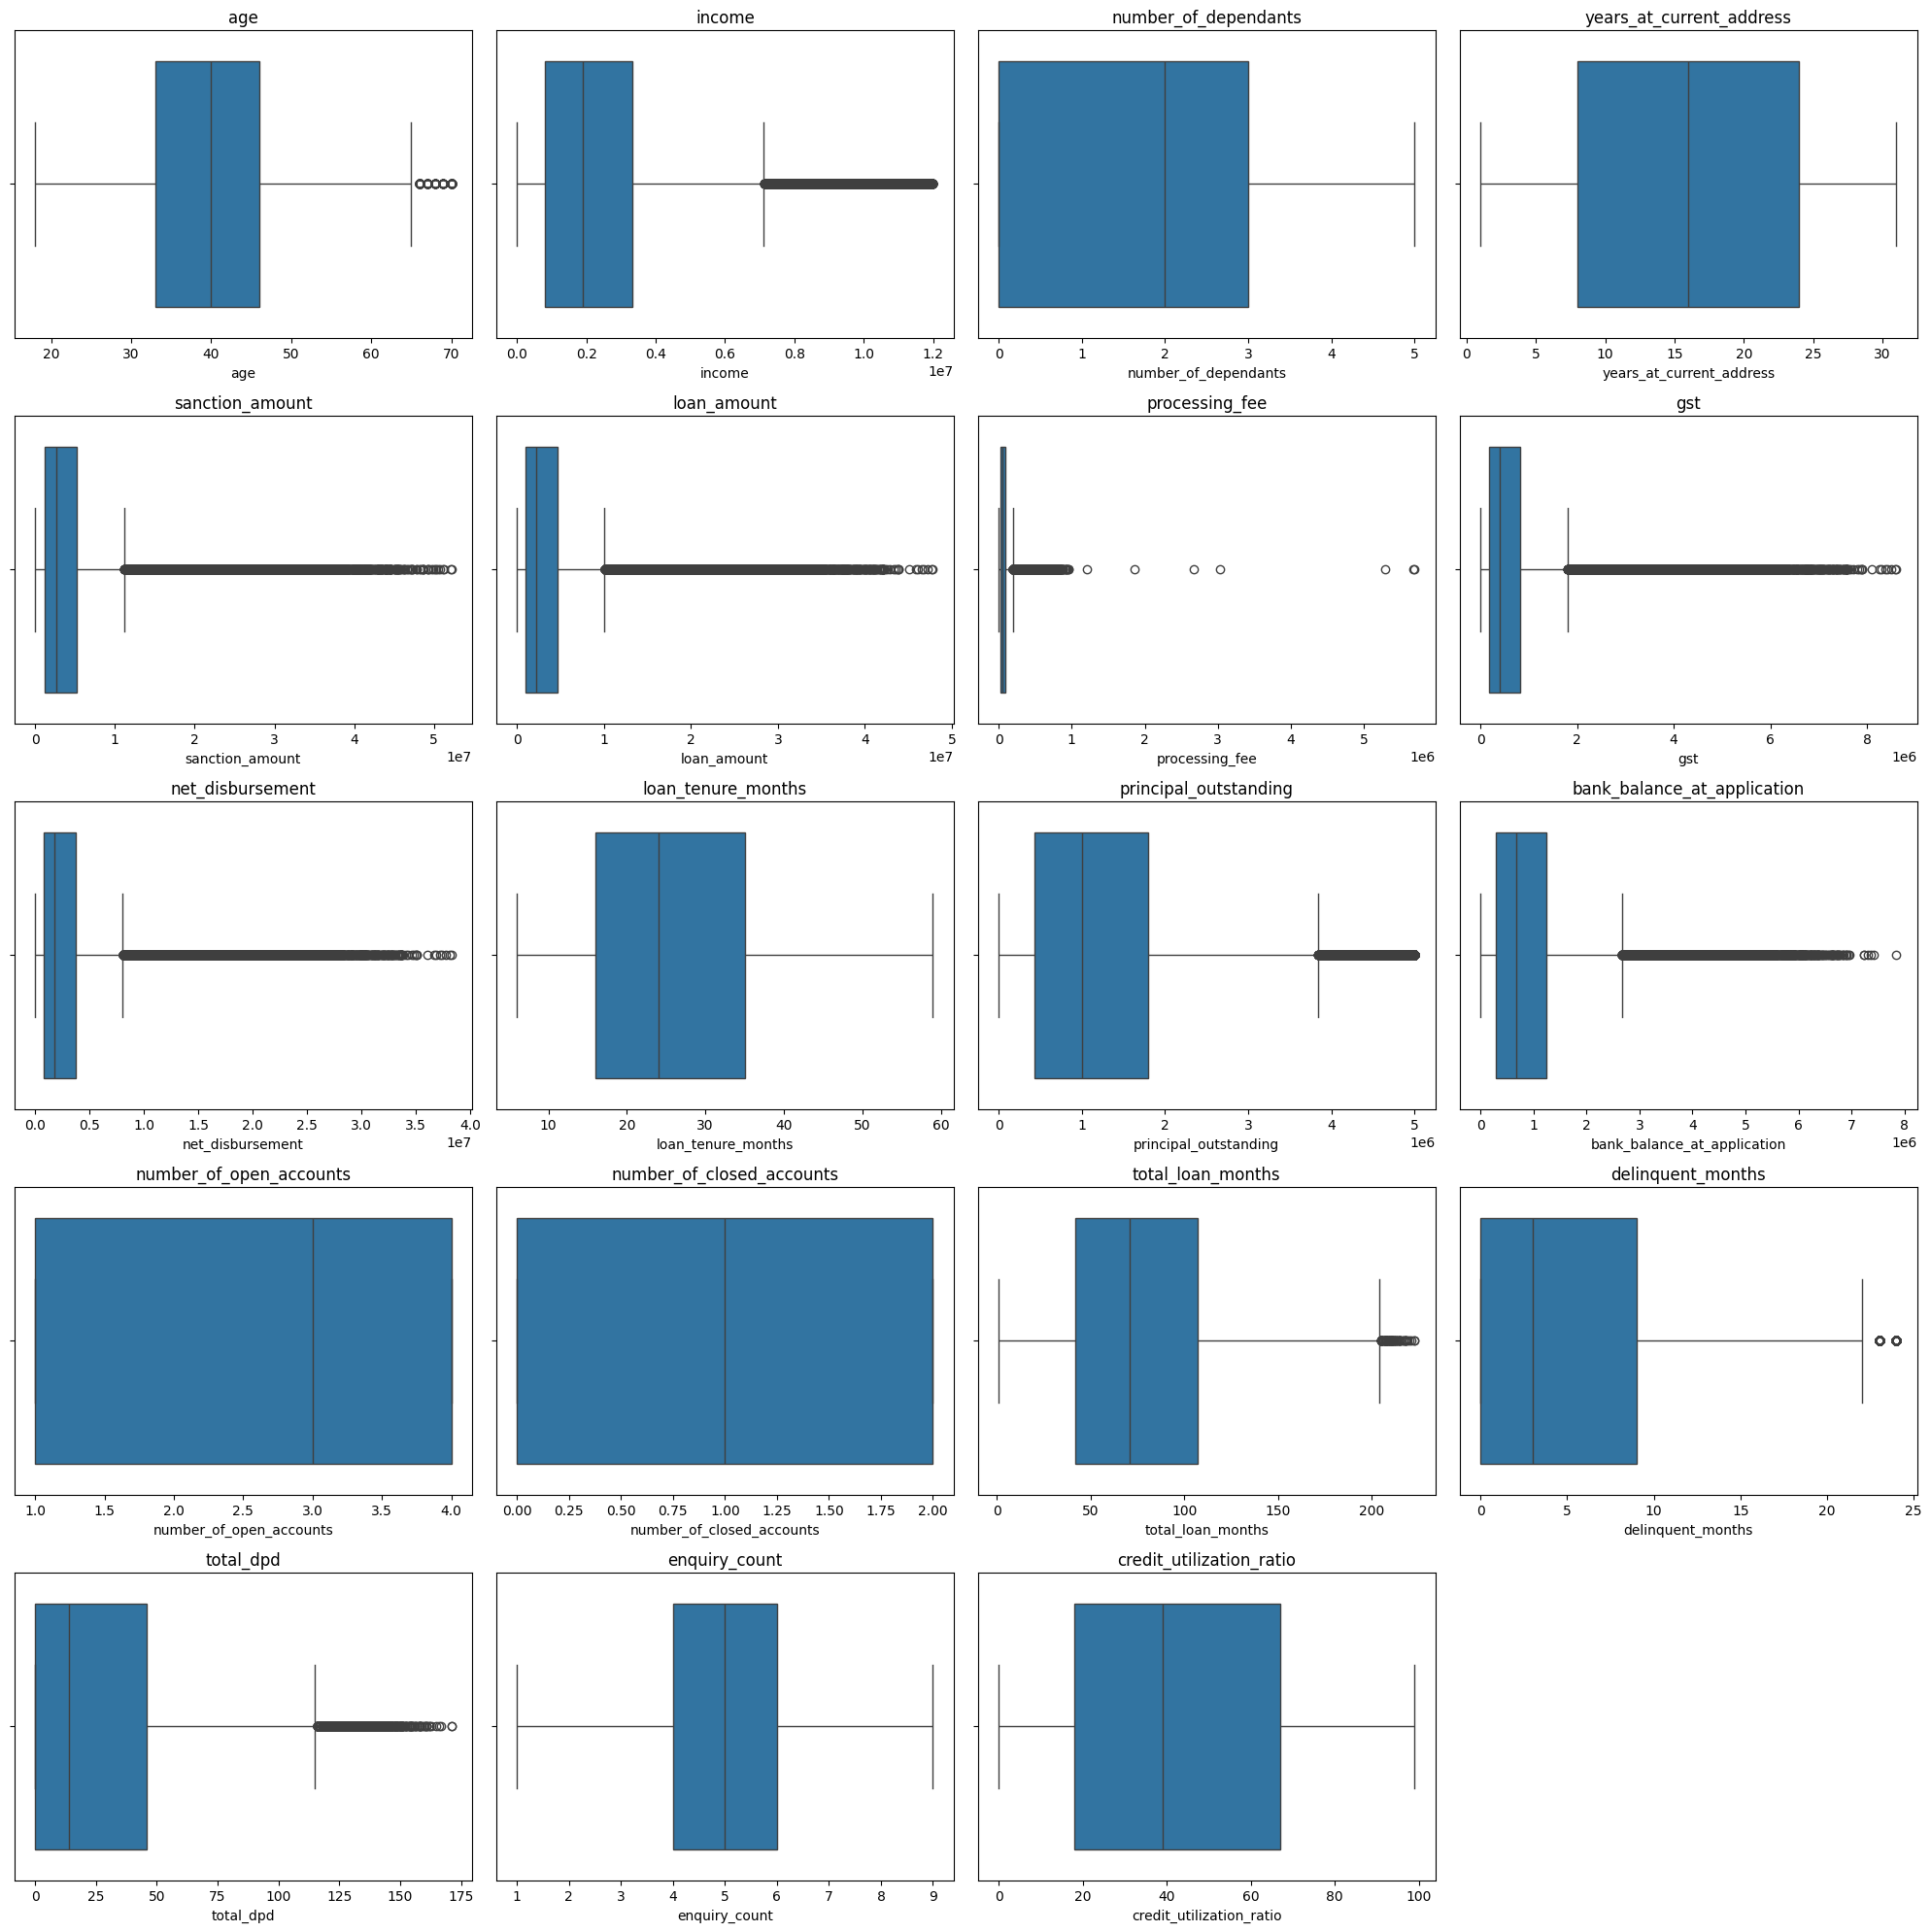

In [27]:
import math

n_cols = 4
n_rows = math.ceil(len(columns_continuous) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i in range(len(columns_continuous)):
    sns.boxplot(x=df[columns_continuous[i]], ax=axes[i])
    axes[i].set_title(columns_continuous[i])

# remove empty subplots (important)
for j in range(len(columns_continuous), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [28]:
### histogram

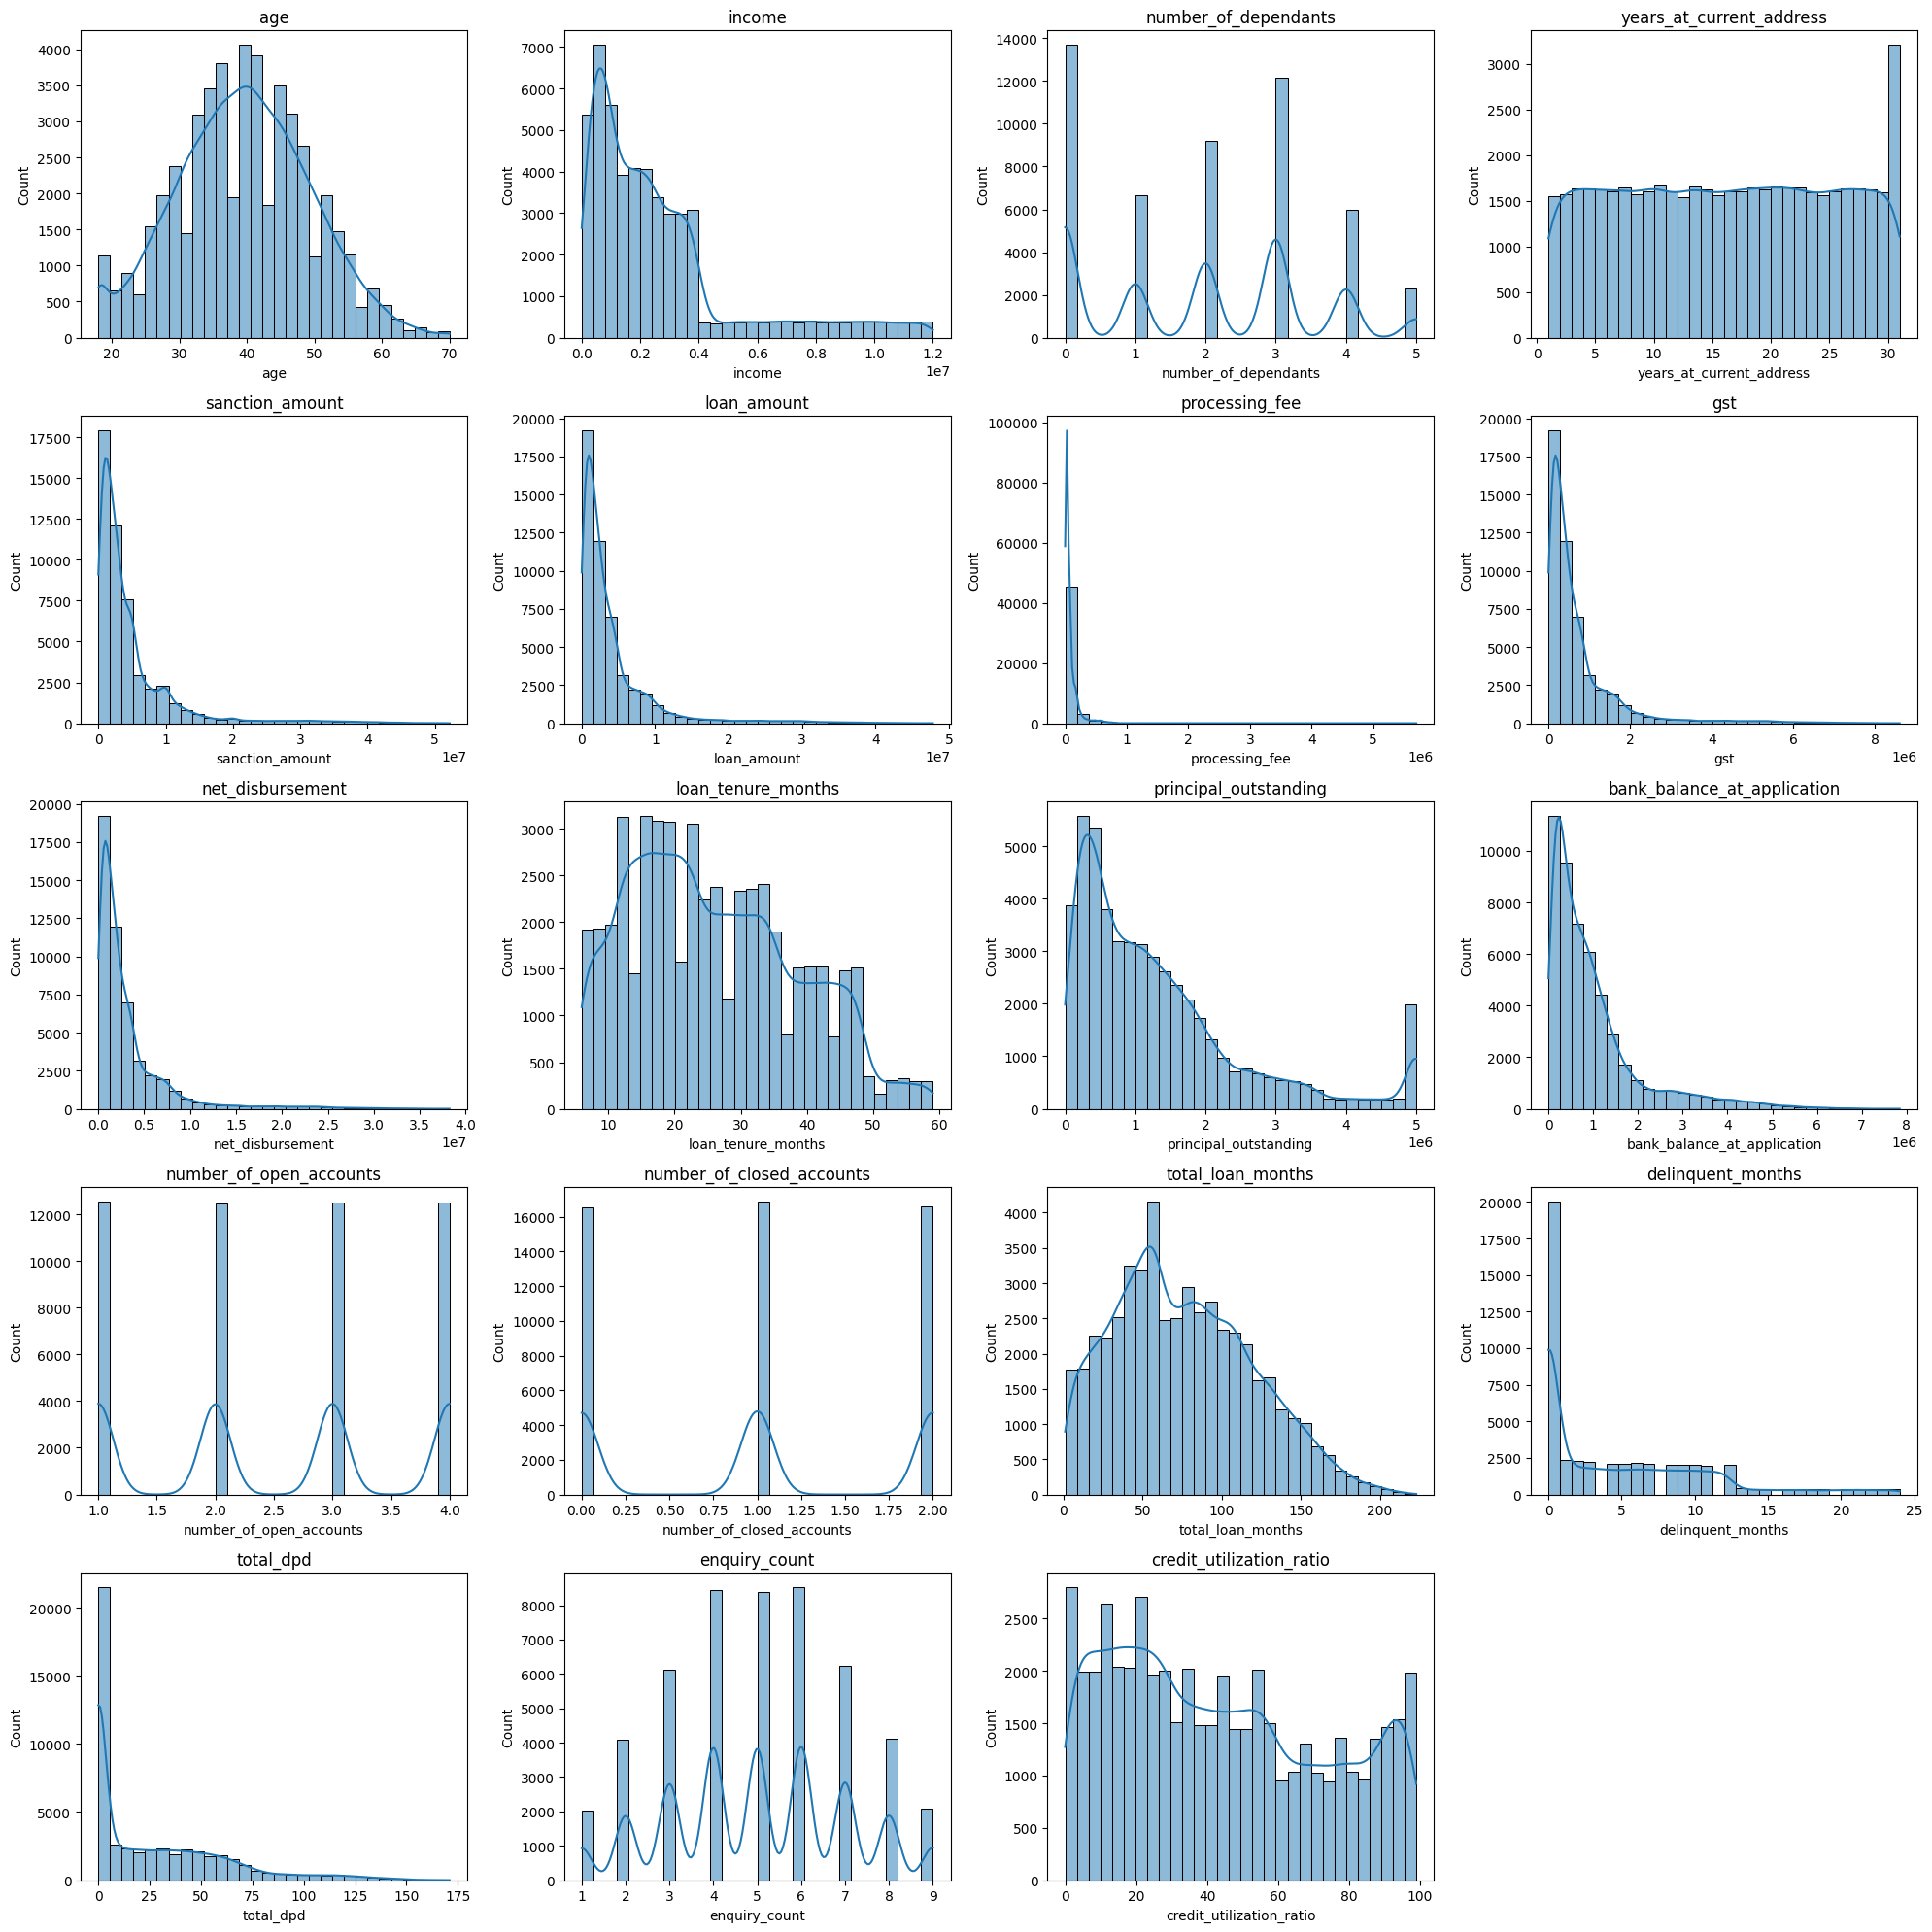

In [29]:
n_cols = 4
n_rows = math.ceil(len(columns_continuous) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i in range(len(columns_continuous)):
    sns.histplot(
        x=df[columns_continuous[i]],
        bins=30,
        kde=True,
        ax=axes[i]
    )
    axes[i].set_title(columns_continuous[i])

# remove empty subplots
for j in range(len(columns_continuous), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [30]:
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

### Outlier Treatment

In [31]:
df_train[df_train.processing_fee > df_train.loan_amount][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [32]:
df_train[(df_train.processing_fee/df_train.loan_amount) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [33]:
### only 5 record lets remove them 

In [34]:
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount) < 0.03].copy()
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount) > 0.03][['loan_amount', 'processing_fee']]

,loan_amount,processing_fee


In [35]:
df_test = df_test[(df_test.processing_fee/df_test.loan_amount) < 0.03].copy()
df_test.shape

(12498, 33)

### Gst check for 20 percent

In [36]:
df_train_1[(df_train_1['gst']/df_train_1['loan_amount'])>0.2][['gst', 'loan_amount']]

,gst,loan_amount


In [37]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [38]:
for col in columns_categorical:
    print(col, "-->" ,df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode --> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [39]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')

df_train_1['loan_purpose'].unique()


array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

<h3 style="color:blue" align="center">Exploratory Data Analysis</h3>

In [40]:
columns_continuous 

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

<Axes: xlabel='age', ylabel='Density'>

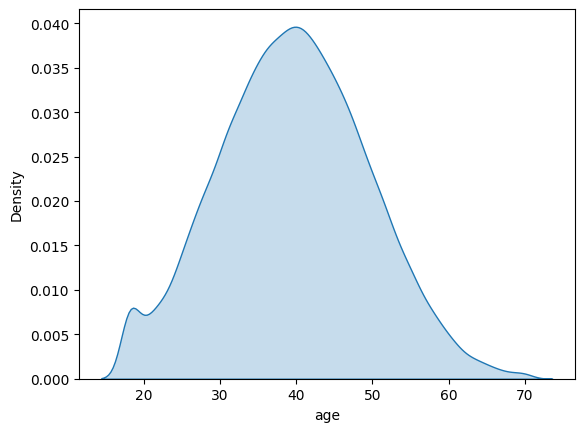

In [41]:
sns.kdeplot(df_train.age, fill=True)

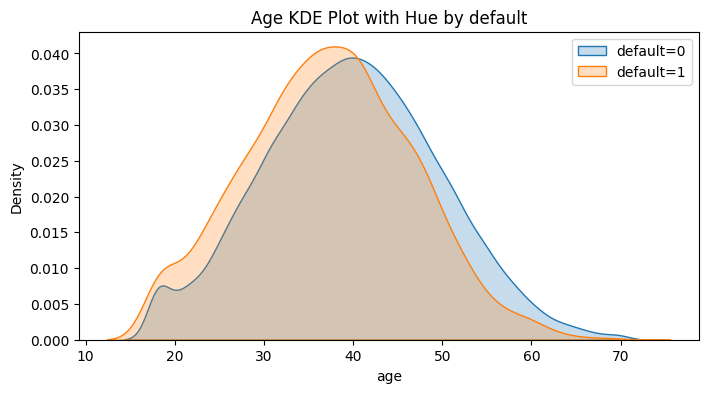

In [42]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Orange (defaulted) group is slightly shifted to left indicating that younger folks are more likely to default on their loans

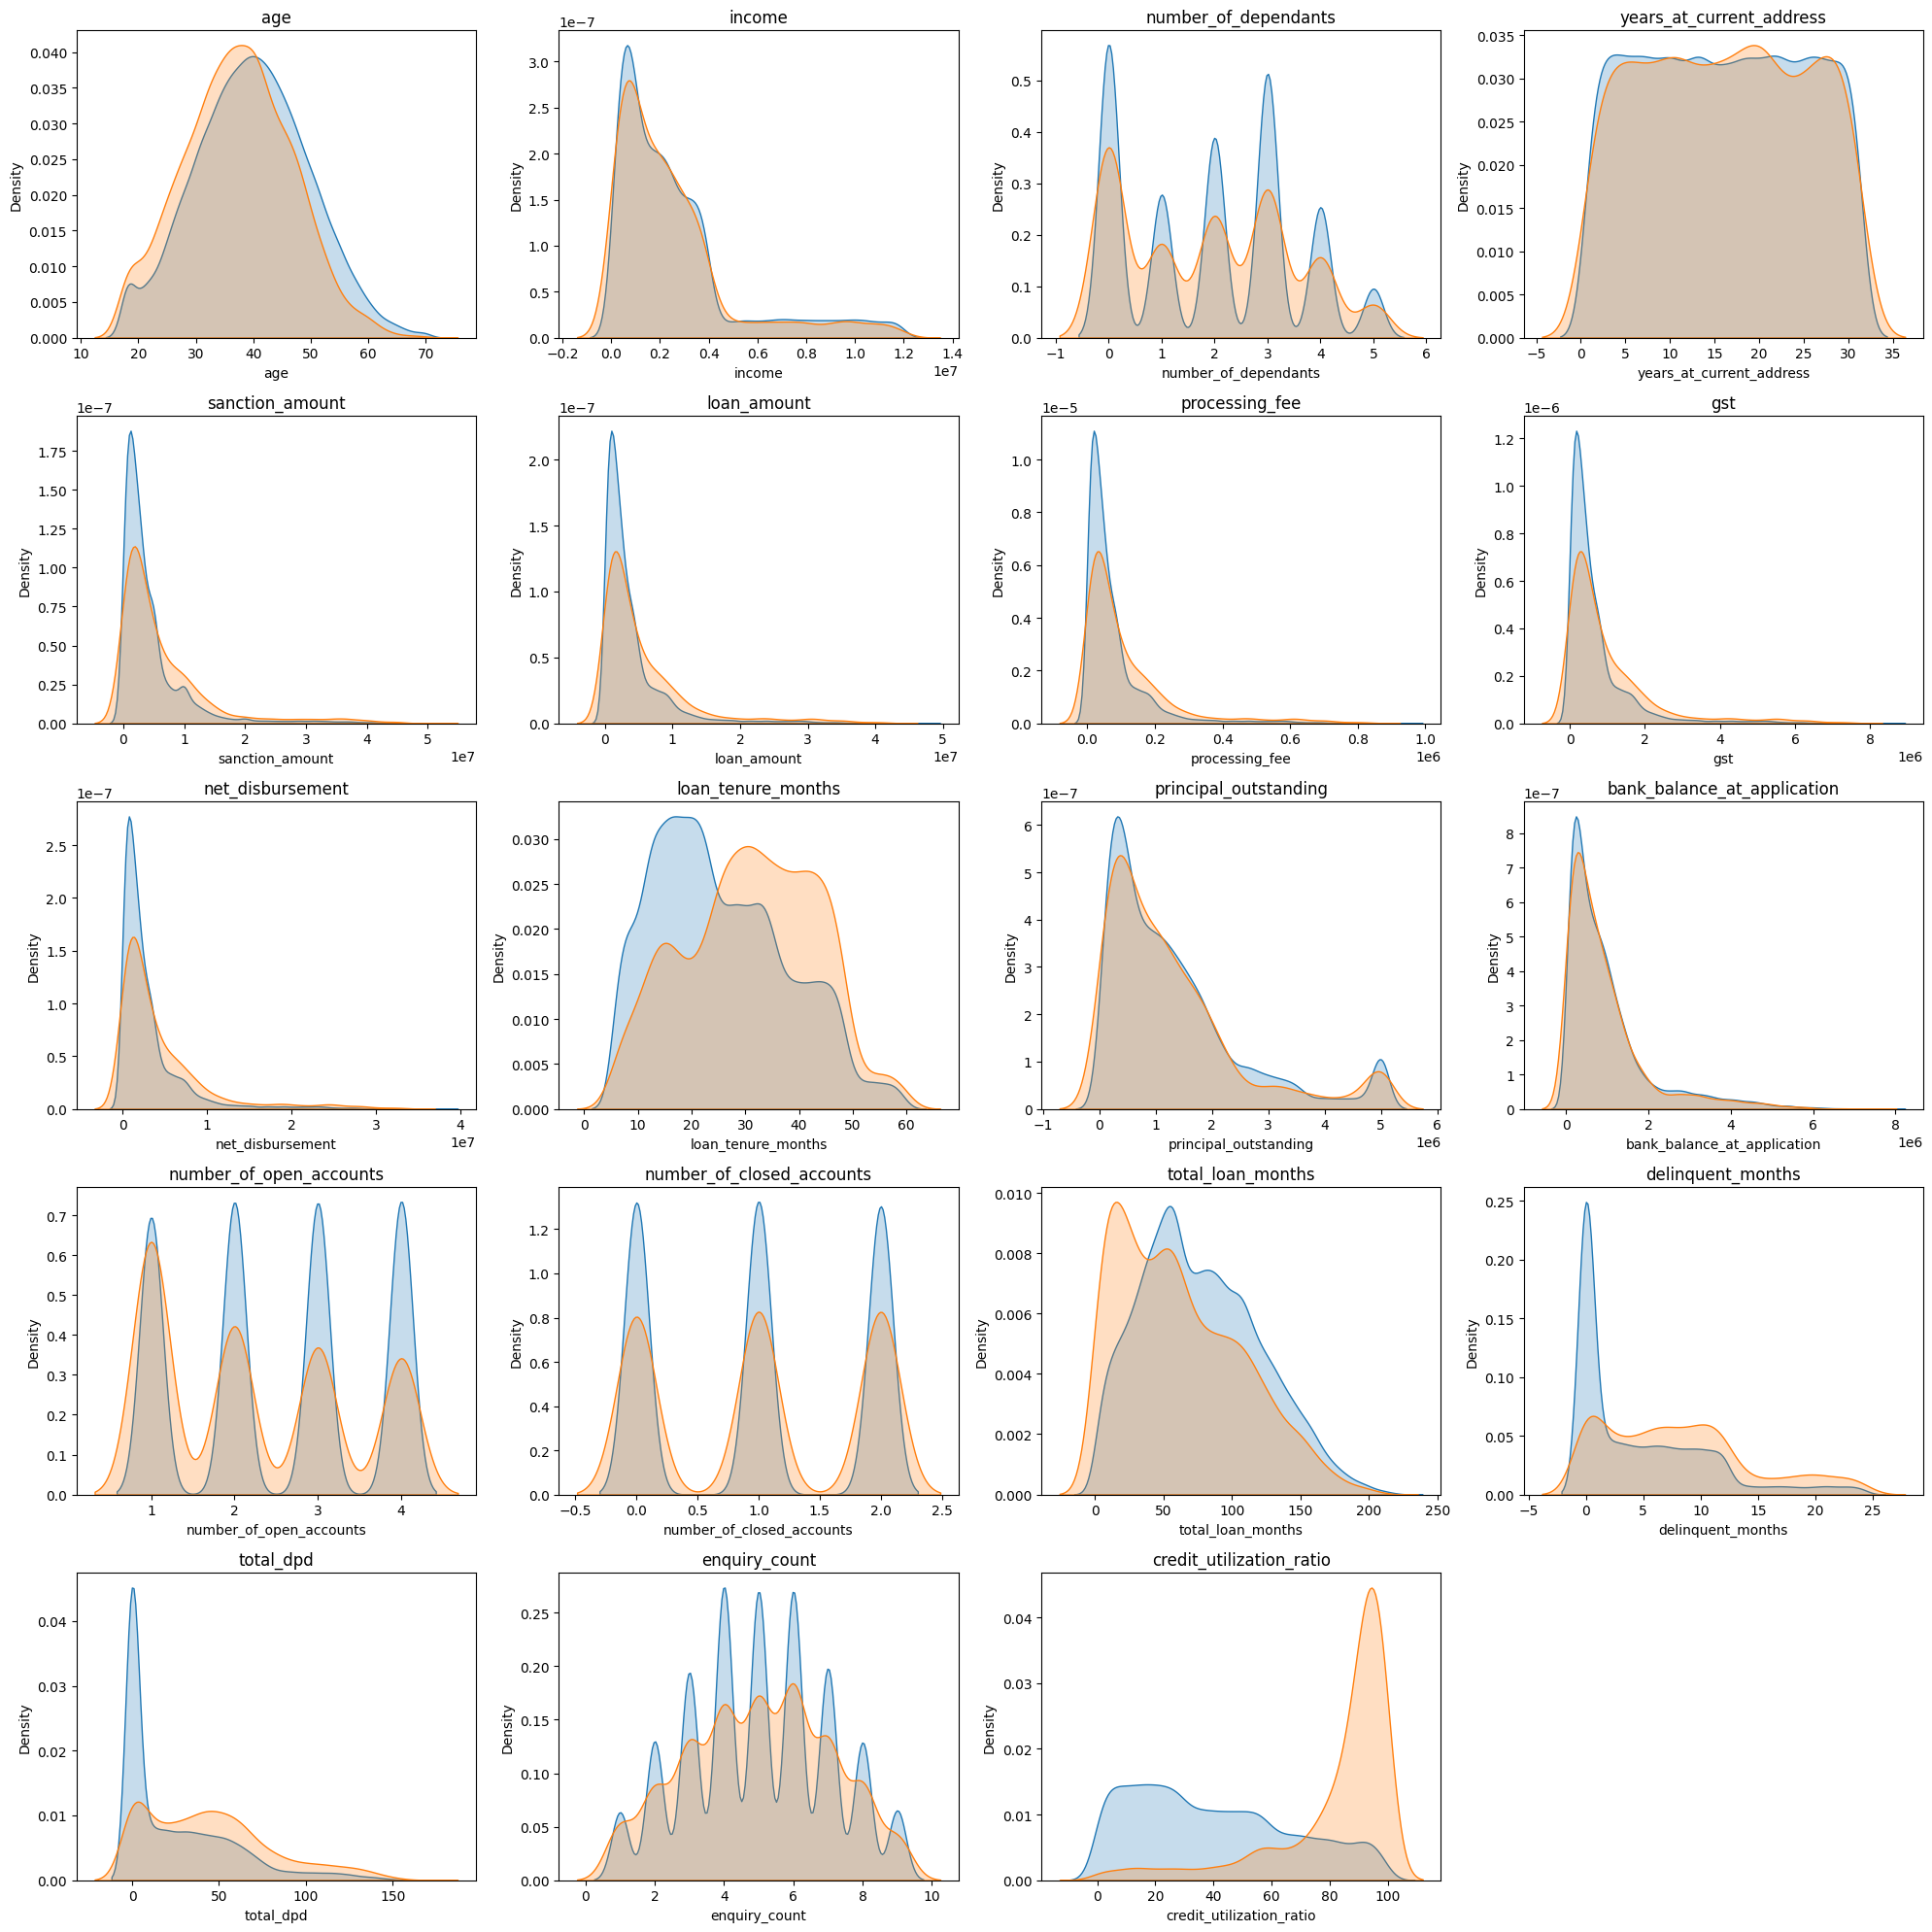

In [43]:
import math

n_cols = 4
n_rows = math.ceil(len(columns_continuous) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.kdeplot(
        df_train_1[col][df_train_1['default'] == 0],
        fill=True,
        label='default=0',
        ax=axes[i]
    )
    sns.kdeplot(
        df_train_1[col][df_train_1['default'] == 1],
        fill=True,
        label='default=1',
        ax=axes[i]
    )
    axes[i].set_title(col)

# remove empty subplots
for j in range(len(columns_continuous), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3 style="color:blue" align="center">Feature Engineering, Feature Selection</h3>

In [44]:
### business has given rules to create new features---. loan to income ratio

In [45]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'] , 2)
df_train_1['loan_to_income'].describe()

count   37487.00
mean        1.55
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.45
max         4.57
Name: loan_to_income, dtype: float64

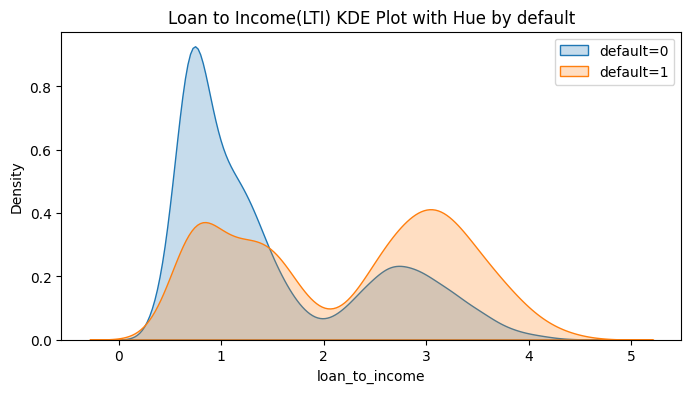

In [46]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income(LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [47]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

In [48]:
### deliquent months to loan months ration- business given 

In [49]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [50]:
df_train_1[['delinquent_months', 'total_loan_months']]

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62
...,...,...
11284,23,129
44732,0,80
38158,0,8
860,5,130


In [51]:
# as i need it in percentage, ill 'x' it by 100
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)
df_train_1[['delinquent_months','total_loan_months','delinquency_ratio']].head(3)

,delinquent_months,total_loan_months,delinquency_ratio
27434,6,90,6.70
13400,4,119,3.40
883,14,83,16.90


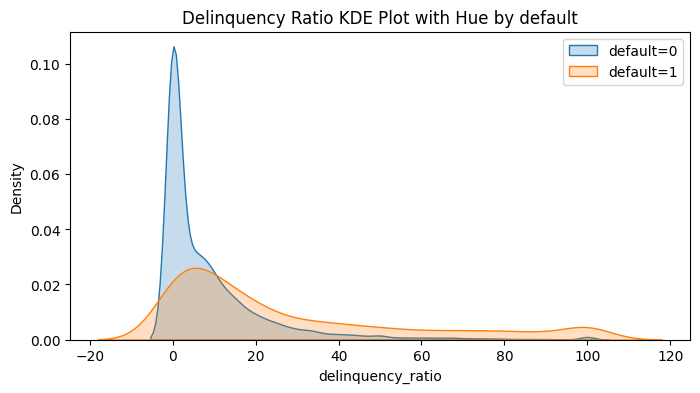

In [52]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [53]:
### average dpd per delinquency --> bsuiness feature

In [54]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

df_train_1['avg_dpd_per_delinquency'].describe()

count   37487.00
mean        3.29
std         2.90
min         0.00
25%         0.00
50%         4.30
75%         5.80
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

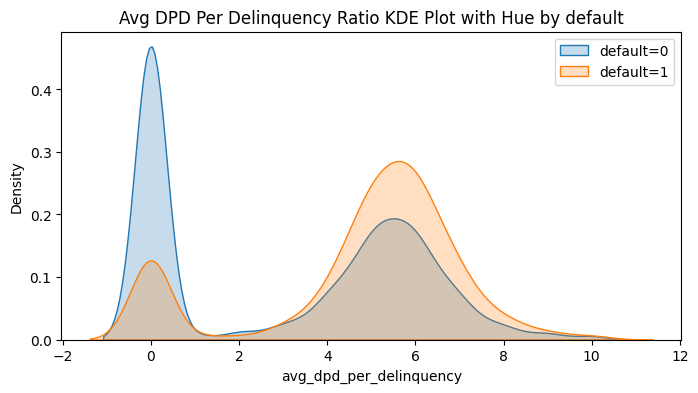

In [55]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

### Feature Selection

In [56]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'], axis=1)
df_test = df_test.drop(['cust_id', 'loan_id'], axis=1)

In [57]:
df_train_2.head(3)

,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,Gujarat,...,2,90,6,33,8,59,0,2.90,6.70,5.50
13400,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,Delhi,...,1,119,4,17,4,92,0,1.08,3.40,4.20
883,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,Uttar Pradesh,...,1,83,14,78,4,83,0,0.66,16.90,5.60


In [58]:
# business gives columns that are not necessary

df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [59]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  int64  
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  int64  
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  int64  
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  int64  
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  sanction_amount              37487 non-null  int64  
 13  processing_fee   

In [60]:
df_train_3.select_dtypes(["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [61]:
df_train_3.drop('zipcode', axis=1, inplace = True) # forgot to remove this 

In [62]:
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'loan_purpose', 'loan_type', 'sanction_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [63]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,loan_purpose,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.52,F,Single,Salaried,0.00,Owned,0.13,Ahmedabad,Gujarat,Home,...,0.34,0.18,0.07,1.00,1.00,0.88,0.60,0.61,0.07,0.55
13400,0.21,M,Single,Salaried,0.00,Owned,0.80,Delhi,Delhi,Auto,...,0.51,0.20,0.12,0.67,0.50,0.38,0.93,0.18,0.03,0.42
883,0.62,F,Single,Self-Employed,0.00,Mortgage,0.93,Lucknow,Uttar Pradesh,Personal,...,0.25,0.27,0.10,0.33,0.50,0.38,0.84,0.08,0.17,0.56
7303,0.48,F,Single,Self-Employed,0.20,Owned,0.87,Bangalore,Karnataka,Auto,...,0.28,0.03,0.01,0.00,0.50,0.50,0.34,0.19,0.00,0.00
45124,0.25,F,Single,Salaried,0.00,Owned,0.87,Jaipur,Rajasthan,Education,...,0.74,0.01,0.01,0.33,0.00,0.50,0.19,0.36,0.10,0.47


In [64]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [65]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,420098.06,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,169419.47,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,110001.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,302001.00,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,411001.00,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,560001.00,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,700001.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [67]:
calculate_vif(X_train[cols_to_scale])

C:\Users\wizar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.58
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,102.15
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.13
8,principal_outstanding,16.27
9,bank_balance_at_application,9.27


In [68]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']
X_train_1 = X_train.drop(features_to_drop_vif, axis=1)
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [69]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.29
1,number_of_dependants,2.72
2,years_at_current_address,3.34
3,loan_tenure_months,5.97
4,bank_balance_at_application,1.79
5,number_of_open_accounts,4.31
6,number_of_closed_accounts,2.33
7,enquiry_count,6.28
8,credit_utilization_ratio,2.88
9,loan_to_income,4.51


In [70]:
selected_numeric_features_vif = vif_df.Column.values

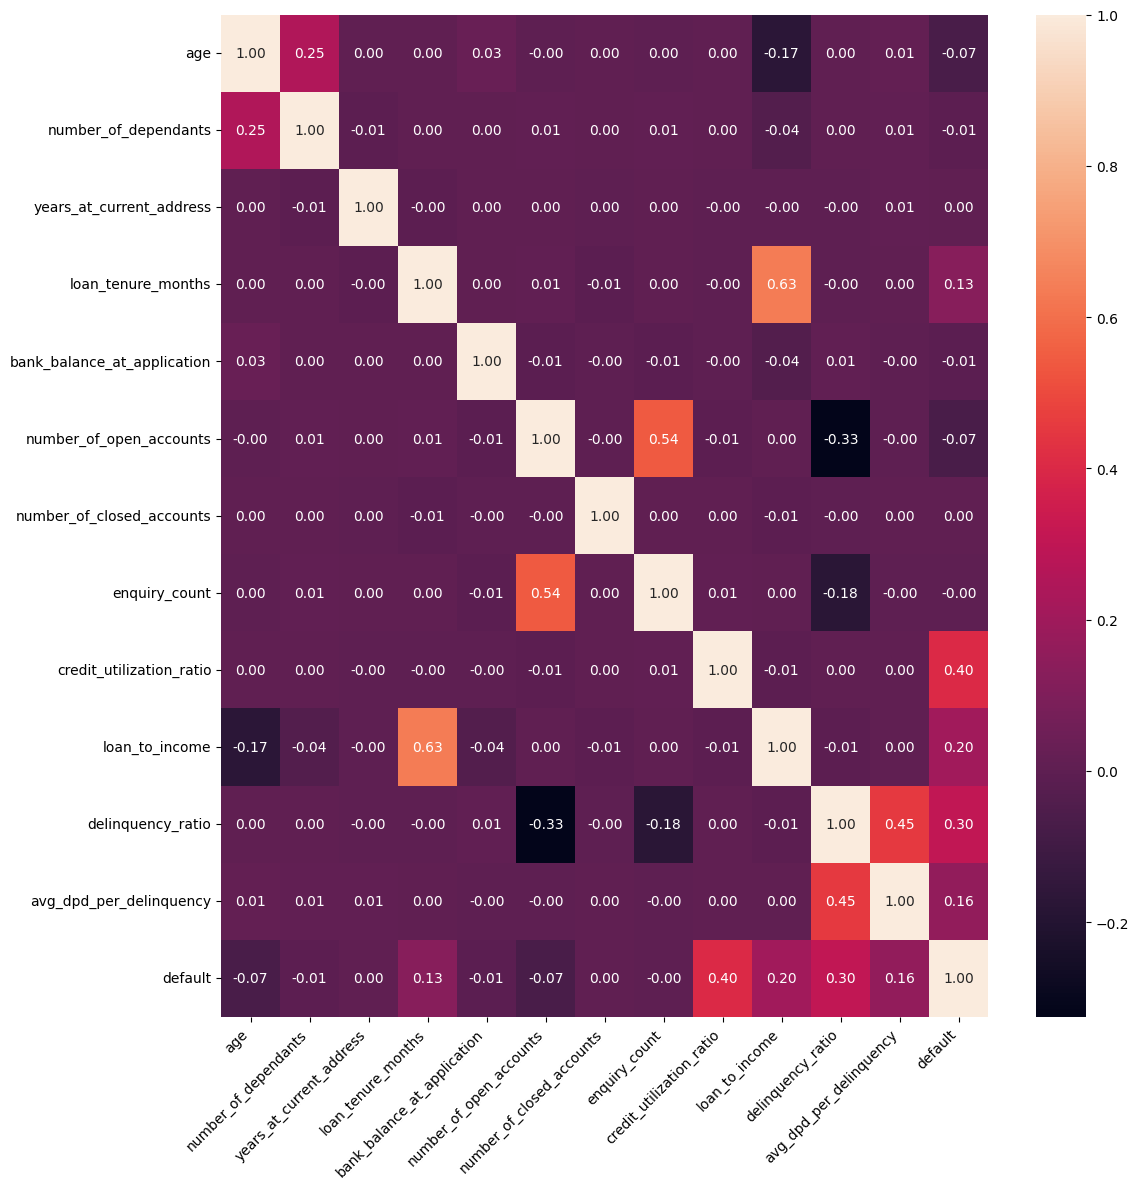

In [71]:
# we'll be using df_train_3, cuz during scaling we dropped 'deafult' feature for X_train which git further refined to X_train_1

plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [72]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

### woe, iv is  be used for dealing with categorical features in credit projects and classification projects

In [73]:
temp = pd.concat([X_train_1,y_train], axis=1)
grouped = temp.groupby("loan_purpose")["default"].agg(['count', 'sum'])
grouped

,count,sum
loan_purpose,,
Auto,7437,314
Education,5626,546
Home,11271,1744
Personal,13153,585


In [74]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum']) # sum will always give sum of binary lik 0+1+0+1 =2, so sum basically is addition of class 1
    grouped = grouped.rename(columns = {'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total']- grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good']/total_good
    grouped['bad_pct'] = grouped['bad']/total_bad

    grouped['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)  # since woe calculation can ahve denominator zero,that can lead to infinity
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)    

    total_iv = grouped['iv'].sum()

    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default') # testing again for single feature
grouped
    

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [75]:
total_iv

np.float64(0.39377543144164784)

In [76]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  float64
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  float64
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  float64
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   loan_purpose                 37487 non-null  object 
 10  loan_type                    37487 non-null  object 
 11  loan_tenure_months           37487 non-null  float64
 12  bank_balance_at_application  37487 non-null  float64
 13  number_of_open_ac

In [77]:
 X_binned = pd.cut(X_train_1['age'], bins=10, labels=False) # sort of like a categorical variable
 X_binned

27434    5
13400    2
883      6
7303     4
45124    2
        ..
11284    2
44732    2
38158    3
860      4
15795    3
Name: age, Length: 37487, dtype: int64

In [78]:
iv_values ={}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == "object": # catgeorical
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train], axis = 1 ) , feature, 'default') # see this will give both grouped and iv, but we need only iv, so thats why we left 1 space blank, also while returning our calculate woe iv function we returned total_iv as second variable so thats why we gave inout to 2nd variale here leaving 1st blank
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False) # for converting continuous value into categorical esque 
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    
    iv_values[feature] = iv
iv_values    

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4915664145044282),
 'delinquency_ratio': np.float64(0.

In [79]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # just for 3 decimal point

iv_df = pd.DataFrame(list(iv_values.items()), columns=['feature', 'IV'] )
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,feature,IV
16,credit_utilization_ratio,2.423
18,delinquency_ratio,0.678
17,loan_to_income,0.492
19,avg_dpd_per_delinquency,0.421
9,loan_purpose,0.394
5,residence_type,0.259
11,loan_tenure_months,0.235
10,loan_type,0.173
0,age,0.076
13,number_of_open_accounts,0.073


In [80]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [81]:
# these are our features that we will be using for training
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [82]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.519,Owned,Home,Secured,0.340,1.000,0.596,0.609,0.067,0.550
13400,0.212,Owned,Auto,Secured,0.509,0.667,0.929,0.183,0.034,0.420
883,0.615,Mortgage,Personal,Unsecured,0.245,0.333,0.838,0.084,0.169,0.560
7303,0.481,Owned,Auto,Secured,0.283,0.000,0.343,0.187,0.000,0.000
45124,0.250,Owned,Education,Secured,0.736,0.333,0.192,0.361,0.097,0.470


### Feature Encoding

In [83]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first = True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first = True)

X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.183,0.034,0.420,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.084,0.169,0.560,False,False,False,False,True,True


<h3 align="center" style="color:blue">Model Training</h3>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.70      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [86]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.74      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [87]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best Score: 0.7629160071967581
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



#### RandomizedSearch CV for Attempt 1: XGBoost

In [88]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7916996030173474
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [89]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [90]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [91]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.53      0.98      0.69      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.95      0.82     12498
weighted avg       0.96      0.92      0.93     12498



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [92]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34223
1    34223
Name: count, dtype: int64

In [93]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [94]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [95]:
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-12-21 15:17:46,847] A new study created in memory with name: no-name-02278766-cd60-4fd3-9a6b-d55f64c346c7
[I 2025-12-21 15:17:47,071] Trial 0 finished with value: 0.9043002396580669 and parameters: {'C': 1.7377501187503224, 'solver': 'lbfgs', 'tol': 0.02265864497507898, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9043002396580669.
[I 2025-12-21 15:17:47,461] Trial 1 finished with value: 0.9448612613976731 and parameters: {'C': 164.1860515350675, 'solver': 'newton-cg', 'tol': 0.0003175286342260259, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9448612613976731.
[I 2025-12-21 15:17:47,773] Trial 2 finished with value: 0.9445495404680658 and parameters: {'C': 1.9824864799255195, 'solver': 'liblinear', 'tol': 0.009124488422088243, 'class_weight': None}. Best is trial 1 with value: 0.9448612613976731.
[I 2025-12-21 15:17:48,141] Trial 3 finished with value: 0.9448765216156908 and parameters: {'C': 23.387955853994445, 'solver': 'liblinear', 'tol': 0.001442

In [97]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9450486240637387
  Params: 
    C: 2982.754675670707
    solver: liblinear
    tol: 0.01742235441988441
    class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [98]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-12-21 15:21:32,945] A new study created in memory with name: no-name-181f0a07-48eb-42b0-b89b-719c42fc613e
[I 2025-12-21 15:21:34,322] Trial 0 finished with value: 0.9662419281518405 and parameters: {'lambda': 4.4878243124398125, 'alpha': 0.006401788135232006, 'subsample': 0.8123030271589575, 'colsample_bytree': 0.5840202430315304, 'max_depth': 9, 'eta': 0.07604203556200512, 'gamma': 3.848013593361028, 'scale_pos_weight': 1.6362304909495105, 'min_child_weight': 4, 'max_delta_step': 4}. Best is trial 0 with value: 0.9662419281518405.
[I 2025-12-21 15:21:35,342] Trial 1 finished with value: 0.9645397417624452 and parameters: {'lambda': 3.5603332167587767, 'alpha': 0.004815193802465179, 'subsample': 0.6484209441182238, 'colsample_bytree': 0.508157334296586, 'max_depth': 9, 'eta': 0.28405633549517684, 'gamma': 9.834574727688352, 'scale_pos_weight': 2.7958515193956477, 'min_child_weight': 4, 'max_delta_step': 10}. Best is trial 0 with value: 0.9662419281518405.
[I 2025-12-21 15:21:36

In [99]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9758590290773844
  Params: 
    lambda: 0.015370485797599904
    alpha: 0.006691579280758569
    subsample: 0.5514200151697913
    colsample_bytree: 0.5146422139432231
    max_depth: 9
    eta: 0.24310179323353712
    gamma: 0.44023446961387735
    scale_pos_weight: 1.570042417935963
    min_child_weight: 6
    max_delta_step: 7
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.74      0.84      0.79      1108

    accuracy                           0.96     12498
   macro avg       0.86      0.91      0.88     12498
weighted avg       0.96      0.96      0.96     12498



In [101]:
best_model_logistic

,penalty,'l2'
,dual,False
,tol,0.01742235441988441
,C,2982.754675670707
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [102]:
best_model_logistic.fit(X_train_smt, y_train_smt)
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.56      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



### ROC-AUC

In [104]:
from sklearn.metrics import roc_curve
probability = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probability[:5]

array([0.00001687, 0.75043473, 0.16214718, 0.43888137, 0.00172823])

In [105]:
fpr, tpr, thresholds = roc_curve(y_test , probability)
fpr[:10], tpr[:10], thresholds[:10]

(array([0.        , 0.        , 0.        , 0.0000878 , 0.0000878 ,
        0.00017559, 0.00017559, 0.00026339, 0.00026339, 0.00035119]),
 array([0.        , 0.00090253, 0.20577617, 0.20577617, 0.23375451,
        0.23375451, 0.26895307, 0.26895307, 0.29963899, 0.29963899]),
 array([       inf, 0.99999977, 0.99806839, 0.99805099, 0.99734684,
        0.99734092, 0.99614985, 0.99613884, 0.99528571, 0.99512449]))

In [106]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9829910492134781

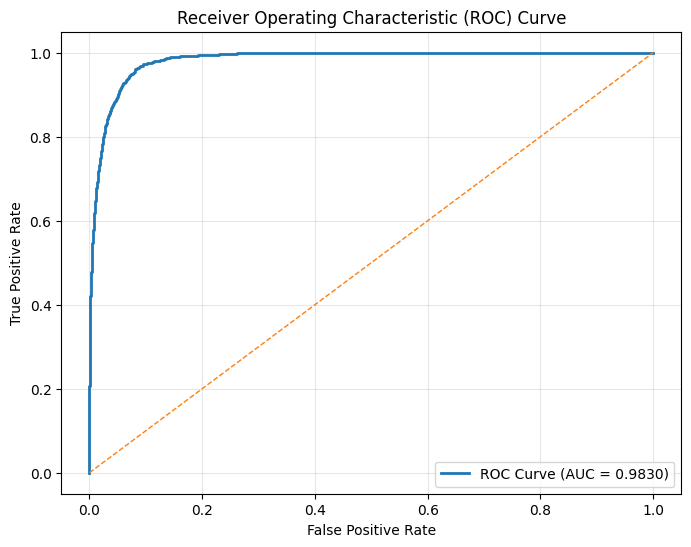

In [109]:
### roc-curve plot

plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr,
    label=f"ROC Curve (AUC = {area:.4f})",
    linewidth=2
)

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

# Labels & title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

# Grid for clarity
plt.grid(alpha=0.3)

plt.show()

In [ ]:
### our model is really very good

## Model Evaluation: RankOrder and Ks Statistics

In [130]:
probability = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probability # always default (positive(1) class is measured, in our case default class
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.750
199,0,0.162


In [131]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10 , labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.750,8
199,0,0.162,7


In [132]:
# create a ew dataframe for decile in which store all values
df_decile = df_eval.groupby('Decile').apply(lambda x :pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-Events': x['Default Truth'].count() - x['Default Truth'].sum(),
}))
df_decile.reset_index(inplace = True)
df_decile

C:\Users\wizar\AppData\Local\Temp\ipykernel_34896\2817867104.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x :pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-Events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.002,0.000,1250.000
5,5,0.002,0.008,1.000,1249.000
6,6,0.008,0.044,3.000,1246.000
7,7,0.044,0.235,17.000,1233.000
8,8,0.236,0.810,170.000,1080.000
9,9,0.810,1.000,917.000,333.000


In [133]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-Events'])
df_decile['Non-Event Rate'] = df_decile['Non-Events']*100 / (df_decile['Events']+df_decile['Non-Events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
4,4,0.000,0.002,0.000,1250.000,0.000,100.000
5,5,0.002,0.008,1.000,1249.000,0.080,99.920
6,6,0.008,0.044,3.000,1246.000,0.240,99.760
7,7,0.044,0.235,17.000,1233.000,1.360,98.640
8,8,0.236,0.810,170.000,1080.000,13.600,86.400
9,9,0.810,1.000,917.000,333.000,73.360,26.640


In [134]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop = True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate
0,9,0.810,1.000,917.000,333.000,73.360,26.640
1,8,0.236,0.810,170.000,1080.000,13.600,86.400
2,7,0.044,0.235,17.000,1233.000,1.360,98.640
3,6,0.008,0.044,3.000,1246.000,0.240,99.760
4,5,0.002,0.008,1.000,1249.000,0.080,99.920
5,4,0.000,0.002,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [135]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-Events'] =  df_decile['Non-Events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate,Cum Events,Cum Non-Events
0,9,0.810,1.000,917.000,333.000,73.360,26.640,917.000,333.000
1,8,0.236,0.810,170.000,1080.000,13.600,86.400,1087.000,1413.000
2,7,0.044,0.235,17.000,1233.000,1.360,98.640,1104.000,2646.000
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [136]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-Event Rate'] = df_decile['Cum Non-Events']*100 / df_decile['Non-Events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate,Cum Events,Cum Non-Events,Cum Event Rate,Cum Non-Event Rate
0,9,0.810,1.000,917.000,333.000,73.360,26.640,917.000,333.000,82.762,2.924
1,8,0.236,0.810,170.000,1080.000,13.600,86.400,1087.000,1413.000,98.105,12.406
2,7,0.044,0.235,17.000,1233.000,1.360,98.640,1104.000,2646.000,99.639,23.231
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000,99.910,34.170
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [137]:
df_decile["KS"] = abs( df_decile['Cum Event Rate'] - df_decile['Cum Non-Event Rate'] )
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-Events,Event Rate,Non-Event Rate,Cum Events,Cum Non-Events,Cum Event Rate,Cum Non-Event Rate,KS
0,9,0.810,1.000,917.000,333.000,73.360,26.640,917.000,333.000,82.762,2.924,79.838
1,8,0.236,0.810,170.000,1080.000,13.600,86.400,1087.000,1413.000,98.105,12.406,85.699
2,7,0.044,0.235,17.000,1233.000,1.360,98.640,1104.000,2646.000,99.639,23.231,76.408
3,6,0.008,0.044,3.000,1246.000,0.240,99.760,1107.000,3892.000,99.910,34.170,65.739
4,5,0.002,0.008,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
5,4,0.000,0.002,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


In [142]:
final_model = best_model_logistic
feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance, index = X_train_encoded.columns ,columns=['Coefficients'])

,Coefficients
age,0.004
loan_tenure_months,0.814
number_of_open_accounts,0.964
credit_utilization_ratio,14.482
loan_to_income,15.616
delinquency_ratio,12.278
avg_dpd_per_delinquency,1.841
residence_type_Owned,-1.735
residence_type_Rented,1.728
loan_purpose_Education,0.892


In [144]:
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
loan_purpose_Home,-2.960
residence_type_Owned,-1.735
age,0.004
loan_tenure_months,0.814
loan_purpose_Education,0.892
number_of_open_accounts,0.964
loan_type_Unsecured,1.009
loan_purpose_Personal,1.009
residence_type_Rented,1.728
avg_dpd_per_delinquency,1.841


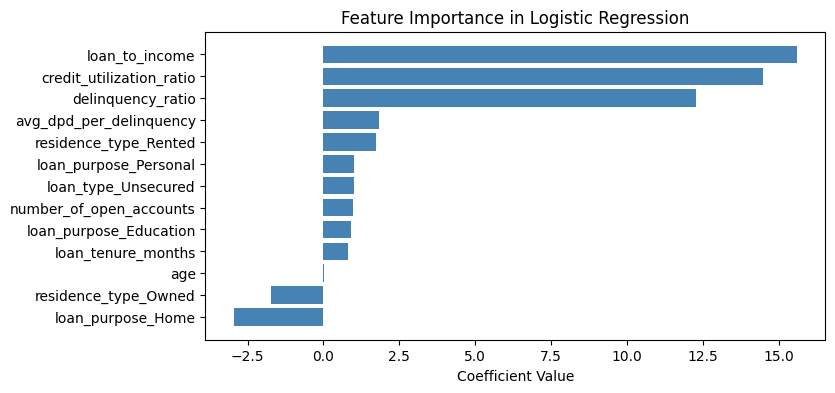

In [145]:
# Plotting 
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [147]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [148]:
gini_coefficient = (2 * area ) - 1
print("AUC:", area)
print("Gini Coefficient:", gini_coefficient) 

AUC: 0.9829910492134781
Gini Coefficient: 0.9659820984269563
